In [2]:
using Pkg
Pkg.activate(joinpath(pwd(),".."))

  Activating environment at `~/Desktop/ECON 627/Project.toml`


In [3]:
using StatsPlots, Distributions, IJulia

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1342


In [4]:
function simulate(θA, θB, μA, μB, ν)
    ΔA = -(θA - θB)/ν
    ΔB = (μB - μA)/ν
    na = 0
    nb = 0
    T = 100000
    δ = Array{Union{Missing, Float64}}(missing, T)
    for t in 1:T
        type = rand(("A","B"))
        if type == "A"
            if θA + ν*na >= θB + ν*nb
                na += 1
            else
                nb += 1
            end
        else
            if μB + ν*nb >= μA + ν*na
                nb += 1
            else 
                na += 1
            end
        end
        δ[t] = na - nb
        if (δ[t] < 20ΔA) || ((δ[t] > 20ΔB))
            break
        end
    end

    δ = δ[.!(ismissing.(δ))]
    @gif for i in 1:round(Int, length(δ)/100):length(δ)
        hline([ΔA ΔB 0], label = "", ylims=(2*ΔA, 2*ΔB), ylabel="δₜ", xlabel="t", grid=nothing, size = (1200,400), margin=10Plots.mm, yguidefontrotation=-90)
        annotate!(length(δ), 1.1*ΔA, Plots.text("ΔA", :right, 10))
        annotate!(length(δ), 1.1*ΔB, Plots.text("ΔB", :right, 10))
        plot!(δ[1:i], xlims = (0, length(δ)), formatter=:plain, label="")
    end
end

simulate (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = /Users/nanwang/Desktop/ECON 627/ECON627/tmp.gif
└ @ Plots /Users/nanwang/.julia/packages/Plots/5kcBO/src/animation.jl:114


Plots.AnimatedGif("/Users/nanwang/Desktop/ECON 627/ECON627/tmp.gif")
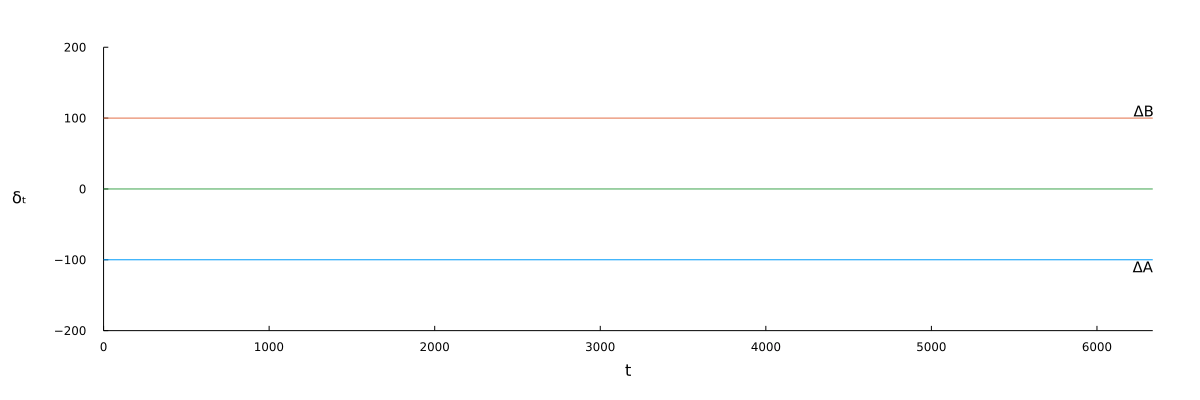

In [5]:
θA = 200.0
θB = 100.0
μA = 100.0
μB = 200.0
ν = 1.0
simulate(θA, θB, μA, μB, ν)